<a href="https://colab.research.google.com/github/nishchaypawar19/CREDIT-CARD-FRAUD-ML/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data=pd.read_csv('/content/Housing_price_last.csv')

In [5]:
data.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [6]:
data.isnull().sum()

,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0
parking,0


In [7]:
data.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder

main_road_le=LabelEncoder()
data['mainroad']=main_road_le.fit_transform(data['mainroad'])
data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,1,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished,11410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished,1820000
541,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished,1767150
542,3620,2,1,1,1,no,no,no,no,0,no,unfurnished,1750000
543,2910,3,1,1,0,no,no,no,no,0,no,furnished,1750000


In [18]:
guestroom_le=LabelEncoder()
data['guestroom']=main_road_le.fit_transform(data['guestroom'])
data.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,1,0,no,no,yes,3,no,furnished,12250000


In [19]:
furnished_le=LabelEncoder()
data['furnishingstatus']=main_road_le.fit_transform(data['furnishingstatus'])
data.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,no,no,yes,2,yes,0,13300000
1,8960,4,4,4,1,0,no,no,yes,3,no,0,12250000


In [20]:
airconditioning

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,no,no,1,2,yes,0,13300000
1,8960,4,4,4,1,0,no,no,1,3,no,0,12250000


In [21]:
prefarea_le=LabelEncoder()
data['prefarea']=main_road_le.fit_transform(data['prefarea'])
data.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,no,no,1,2,1,0,13300000
1,8960,4,4,4,1,0,no,no,1,3,0,0,12250000


In [22]:
hotwaterheating_le=LabelEncoder()
data['hotwaterheating']=main_road_le.fit_transform(data['hotwaterheating'])
data.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,no,0,1,2,1,0,13300000
1,8960,4,4,4,1,0,no,0,1,3,0,0,12250000


In [23]:
basement_le=LabelEncoder()
data['basement']=main_road_le.fit_transform(data['basement'])
data.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,0,0,1,2,1,0,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,0,12250000


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
input_data=data.iloc[:,:-1]
output_data=data['price']

In [30]:
ss= StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data), columns=input_data.columns)

In [32]:
input_data.head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [43]:
lr=LinearRegression()
lr.fit (x_train,y_train)
lr.score(x_train,y_train)*100, lr.score(x_test,y_test)*100

(68.54429472843788, 64.94754192267793)

In [41]:
lr1=Lasso(alpha=0.5)
lr1.fit (x_train,y_train)
lr1.score(x_train,y_train)*100, lr1.score(x_test,y_test)*100

(68.54429472839587, 64.94752504177829)

In [ ]:
lr2=Lasso(alpha=10)
lr2.fit (x_train,y_train)
lr2.score(x_train,y_train)*100, lr1.score(x_test,y_test)*100

In [44]:
dt=DecisionTreeRegressor()
dt.fit (x_train,y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(99.85402884288594, 40.71124243963495)

In [45]:
rf=RandomForestRegressor()
rf.fit (x_train,y_train)
rf.score(x_train,y_train)*100, rf.score(x_test,y_test)*100

(95.04496727563071, 61.48852097641742)

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Model
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

# Best model
best_rf = grid.best_estimator_

# Predictions
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Accuracy
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

print("Best Parameters:", grid.best_params_)
print(f"Train R² Score: {train_score:.2f}")
print(f"Test R² Score: {test_score:.2f}")

Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Train R² Score: 0.77
Test R² Score: 0.59


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import joblib  # Optional, for saving the model

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(x_train, y_train)

# Best estimator from grid search
best_rf = grid.best_estimator_

# Predict using the best model
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Evaluate performance
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

print("✅ Best Hyperparameters:", grid.best_params_)
print(f"✅ Train R² Score: {train_score:.2f}")
print(f"✅ Test R² Score: {test_score:.2f}")

# Optional: Save the model
joblib.dump(best_rf, 'best_rf_model.pkl')

✅ Best Hyperparameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
✅ Train R² Score: 0.77
✅ Test R² Score: 0.59


['best_rf_model.pkl']

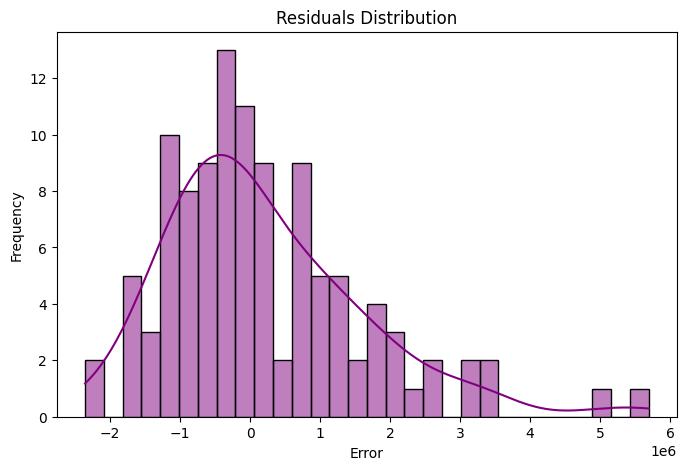

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_test_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


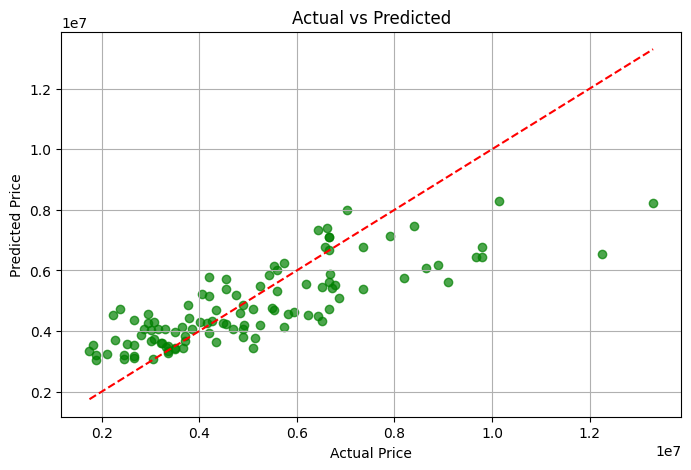

In [51]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()



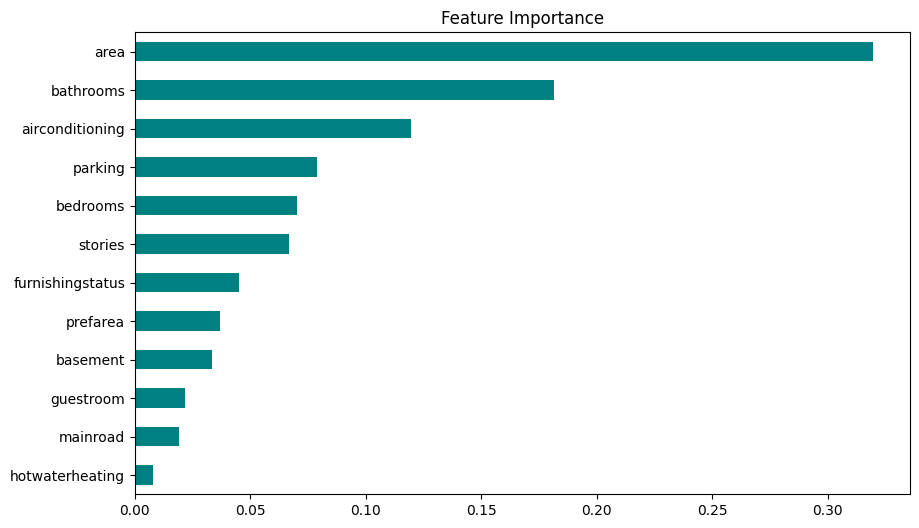

In [53]:
import pandas as pd

feature_importance = pd.Series(best_rf.feature_importances_, index=x_train.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(10,6), color='teal')
plt.title("Feature Importance")
plt.show()

In [54]:
# Save model
import joblib
joblib.dump(best_rf, "best_rf_model.pkl")

# To load later:
# loaded_model = joblib.load("best_rf_model.pkl")


['best_rf_model.pkl']

In [56]:
# Example: new input (shape should match training data)
# Assuming the order of features is the same as in input_data
# area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus
new_input = [[1200, 3, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1]]  # Dummy example with 12 features

# Scale the new input using the fitted scaler
# Assuming 'ss' scaler object is available from previous steps
new_input_scaled = ss.transform(new_input)

prediction = best_rf.predict(new_input_scaled)
print("Predicted House Price:", prediction[0])

Predicted House Price: 5111327.432542734


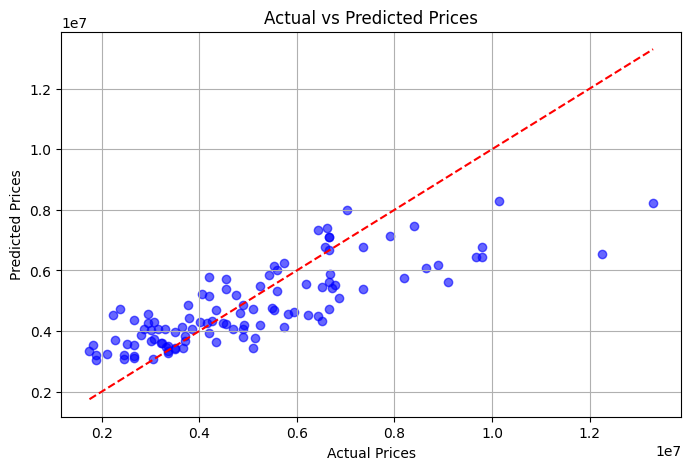

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')